In [270]:
# Import libraries
import numpy as np
import pandas as pd
import requests
import io
import json
import csv

# plots
import matplotlib.pyplot as plt
import seaborn as sns

IMPORT DATA

In [272]:
# Import csv file
gas_demand_path =  r'/Users/haste/Desktop/Project/gas_demand.csv'
gas_demand = pd.read_csv(gas_demand_path)

# Overview, show the first 5 rows
gas_demand.head()

,Date,Daily Metered,Non Daily Metered,Large Daily Metered non Power Gen,Power Generation,Total ROI demand
0,01/01/2021,7.816340,61.593662,9.972410,98.520732,177.903144
1,02/01/2021,8.819988,64.817927,11.365715,97.945353,182.948983
2,03/01/2021,8.363208,65.084971,11.926284,99.608449,184.982912
3,04/01/2021,11.070071,73.712590,13.402225,110.697948,208.882834
4,05/01/2021,11.696971,72.342131,14.098853,117.179088,215.317043


In [273]:
gas_demand.info()
# It is a pandas.core.frame.DataFrame object
# It has a range index with 820 entries, ranging from 0 to 819
# There are 6 columns in total
# There are 6 columns in total

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820 entries, 0 to 819
Data columns (total 6 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Date                               820 non-null    object 
 1   Daily Metered                      820 non-null    float64
 2   Non Daily Metered                  820 non-null    float64
 3   Large Daily Metered non Power Gen  820 non-null    float64
 4   Power Generation                   820 non-null    float64
 5   Total ROI demand                   820 non-null    float64
dtypes: float64(5), object(1)
memory usage: 38.6+ KB


In [274]:
gas_demand.shape
# There are 820 rows and 6 columns

(820, 6)

In [275]:
# Import weather data for Dublin in period from '2021-01-01' to '2022-12-31'
r = requests.get('https://api.oikolab.com/weather',
                 params={'param': ['temperature','wind_speed'],
                         'start': '2021-01-01',
                         'end': '2022-12-31',
                         'freq':'D',
                         'resample_method':'mean',
                         'location':'Dublin',
                         'format':'csv',
                         'api-key': '48610c31fafe40c1befd15c29667d79a'}
                 )
weather = pd.read_csv(io.StringIO(r.content.decode('utf-8')))

# Overview, show the first 5 rows
weather.head()

,datetime (UTC),"coordinates (lat,lon)",model (name),model elevation (surface),utc_offset (hrs),temperature (degC),wind_speed (m/s)
0,2021-01-01,"(53.3498006, -6.2602964)",era5,115.07,0.0,3.11,4.65
1,2021-01-02,"(53.3498006, -6.2602964)",era5,115.07,0.0,1.55,4.41
2,2021-01-03,"(53.3498006, -6.2602964)",era5,115.07,0.0,1.74,4.38
3,2021-01-04,"(53.3498006, -6.2602964)",era5,115.07,0.0,3.73,5.39
4,2021-01-05,"(53.3498006, -6.2602964)",era5,115.07,0.0,3.37,4.69


In [277]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   datetime (UTC)             730 non-null    object 
 1   coordinates (lat,lon)      730 non-null    object 
 2   model (name)               730 non-null    object 
 3   model elevation (surface)  730 non-null    float64
 4   utc_offset (hrs)           730 non-null    float64
 5   temperature (degC)         730 non-null    float64
 6   wind_speed (m/s)           730 non-null    float64
dtypes: float64(4), object(3)
memory usage: 40.0+ KB


PREPARING DATA

In [278]:
# check 'gas_demand' for null values
gas_demand.isnull()

,Date,Daily Metered,Non Daily Metered,Large Daily Metered non Power Gen,Power Generation,Total ROI demand
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
815,False,False,False,False,False,False
816,False,False,False,False,False,False
817,False,False,False,False,False,False
818,False,False,False,False,False,False


In [279]:
#Handling Nulls for 'gas_demand'
missing_values_count_gas_demand = gas_demand.isnull().sum()
print(missing_values_count_gas_demand)

Date                                 0
Daily Metered                        0
Non Daily Metered                    0
Large Daily Metered non Power Gen    0
Power Generation                     0
Total ROI demand                     0
dtype: int64


In [280]:
# check 'weather' for null values
weather.isnull()

,datetime (UTC),"coordinates (lat,lon)",model (name),model elevation (surface),utc_offset (hrs),temperature (degC),wind_speed (m/s)
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
725,False,False,False,False,False,False,False
726,False,False,False,False,False,False,False
727,False,False,False,False,False,False,False
728,False,False,False,False,False,False,False


In [281]:
#Handling Nulls for 'weather'
missing_values_count_weather = weather.isnull().sum()
print(missing_values_count_weather)

datetime (UTC)               0
coordinates (lat,lon)        0
model (name)                 0
model elevation (surface)    0
utc_offset (hrs)             0
temperature (degC)           0
wind_speed (m/s)             0
dtype: int64


In [282]:
#left only needed columns for 'gas_demand_clear'
gas_demand_clear = gas_demand[['Date','Total ROI demand']]
gas_demand_clear.head()

,Date,Total ROI demand
0,01/01/2021,177.903144
1,02/01/2021,182.948983
2,03/01/2021,184.982912
3,04/01/2021,208.882834
4,05/01/2021,215.317043


In [283]:
print(type(gas_demand_clear))

<class 'pandas.core.frame.DataFrame'>


In [284]:
# Rename the 'datetime (UTC)' column
weather = weather.rename(columns={'datetime (UTC)': 'Date'})

# Convert 'Date' column to DD/MM/YYYY format
weather['Date'] = pd.to_datetime(weather['Date'])
weather['Date'] = weather['Date'].dt.strftime('%d/%m/%Y')

weather.head(10)

,Date,"coordinates (lat,lon)",model (name),model elevation (surface),utc_offset (hrs),temperature (degC),wind_speed (m/s)
0,01/01/2021,"(53.3498006, -6.2602964)",era5,115.07,0.0,3.11,4.65
1,02/01/2021,"(53.3498006, -6.2602964)",era5,115.07,0.0,1.55,4.41
2,03/01/2021,"(53.3498006, -6.2602964)",era5,115.07,0.0,1.74,4.38
3,04/01/2021,"(53.3498006, -6.2602964)",era5,115.07,0.0,3.73,5.39
4,05/01/2021,"(53.3498006, -6.2602964)",era5,115.07,0.0,3.37,4.69
5,06/01/2021,"(53.3498006, -6.2602964)",era5,115.07,0.0,1.09,2.64
6,07/01/2021,"(53.3498006, -6.2602964)",era5,115.07,0.0,0.33,3.59
7,08/01/2021,"(53.3498006, -6.2602964)",era5,115.07,0.0,0.51,4.62
8,09/01/2021,"(53.3498006, -6.2602964)",era5,115.07,0.0,-0.22,2.66
9,10/01/2021,"(53.3498006, -6.2602964)",era5,115.07,0.0,3.40,4.28


In [285]:
#left only needed columns for 'weather_clear'
weather_clear = weather[['Date','temperature (degC)', 'wind_speed (m/s)']]
weather_clear.head()

,Date,temperature (degC),wind_speed (m/s)
0,01/01/2021,3.11,4.65
1,02/01/2021,1.55,4.41
2,03/01/2021,1.74,4.38
3,04/01/2021,3.73,5.39
4,05/01/2021,3.37,4.69


In [286]:
print(type(weather_clear))

<class 'pandas.core.frame.DataFrame'>


In [287]:
# Merge 'weather_clear' to the 'gas_demand_clear'
weather_gas_demand = weather_clear.merge(gas_demand_clear, on = 'Date', how = 'left')

print (weather_gas_demand)

           Date  temperature (degC)  wind_speed (m/s)  Total ROI demand
0    01/01/2021                3.11              4.65        177.903144
1    02/01/2021                1.55              4.41        182.948983
2    03/01/2021                1.74              4.38        184.982912
3    04/01/2021                3.73              5.39        208.882834
4    05/01/2021                3.37              4.69        215.317043
..          ...                 ...               ...               ...
725  27/12/2022                6.76              5.43        118.018221
726  28/12/2022                7.93              5.70        111.254705
727  29/12/2022                5.91              7.24        128.895748
728  30/12/2022                8.77              7.65        134.819166
729  31/12/2022                6.66              1.95        172.013218

[730 rows x 4 columns]


In [288]:
# Check if missing data
weather_gas_demand.isnull().sum()

Date                  0
temperature (degC)    0
wind_speed (m/s)      0
Total ROI demand      0
dtype: int64

In [289]:
#Boolean check of duplicates
weather_gas_demand.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
725    False
726    False
727    False
728    False
729    False
Length: 730, dtype: bool

In [290]:
weather_gas_demand.duplicated().sum()
# There are no duplicates

0

In [291]:
weather_gas_demand.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                730 non-null    object 
 1   temperature (degC)  730 non-null    float64
 2   wind_speed (m/s)    730 non-null    float64
 3   Total ROI demand    730 non-null    float64
dtypes: float64(3), object(1)
memory usage: 28.5+ KB


In [292]:
#Sorting weather_gas_demand_sorted by 'Date' (ascending ) and then 'Total ROI demand' in descending order
weather_gas_demand_sorted = weather_gas_demand.sort_values(["Total ROI demand", "temperature (degC)"], ascending = [False, True])
weather_gas_demand_sorted.head(10)

,Date,temperature (degC),wind_speed (m/s),Total ROI demand
713,15/12/2022,-1.04,3.52,258.821017
707,09/12/2022,-0.32,3.21,254.821945
710,12/12/2022,-0.55,1.57,248.479445
7,08/01/2021,0.51,4.62,248.034477
5,06/01/2021,1.09,2.64,240.853722
706,08/12/2022,1.29,3.29,240.553187
712,14/12/2022,0.71,4.32,240.097329
6,07/01/2021,0.33,3.59,239.993926
714,16/12/2022,-0.36,3.45,237.183444
709,11/12/2022,0.54,2.88,233.720715


In [293]:
print(weather_gas_demand[weather_gas_demand['wind_speed (m/s)']>10])

           Date  temperature (degC)  wind_speed (m/s)  Total ROI demand
53   23/02/2021               10.47             10.01        145.919672
341  08/12/2021                4.80             11.03        167.306815
411  16/02/2022               10.79             10.27        128.449468
415  20/02/2022                8.20             10.65        133.395158


ANALYSIS

In [294]:
# For loop to get the average 'gas demand' per year
mean_per_year_gas_demand = {}

weather_gas_demand['Date'] = pd.to_datetime(weather_gas_demand['Date'])
for index, row in weather_gas_demand.iterrows():
    year = row['Date'].year
    if year in mean_per_year_gas_demand:
      mean_per_year_gas_demand[year].append(row["Total ROI demand"])
    else:
      mean_per_year_gas_demand[year] = [row['Total ROI demand']]

result_gas_demand_year = {}

for year, values in mean_per_year_gas_demand.items():
  result_gas_demand_year[year] = sum(values)/len(values)

result_str_year = "The average gas demand per year is: "
for year, avg_demand in result_gas_demand_year.items():
    result_str_year += str(year) + ": " + str(avg_demand) + ", "
result_str_year = result_str_year[:-2]

print(result_str_year)

The average gas demand per year is: 2021: 151.741856049315, 2022: 154.93578857260272


In [295]:
# For loop to get the average 'gas deman' per year
mean_per_month_gas_demand = {}

#weather_gas_demand['Date'] = pd.to_datetime(weather_gas_demand['Date'])
for index, row in weather_gas_demand.iterrows():
    month = row['Date'].month
    if year in mean_per_month_gas_demand:
      mean_per_month_gas_demand[month].append(row["Total ROI demand"])
    else:
      mean_per_month_gas_demand[month] = [row['Total ROI demand']]

result_gas_demand_month = {}

for year, values in mean_per_month_gas_demand.items():
  result_gas_demand_month[month] = sum(values)/len(values)

result_str_month = "The average gas demand per month is: "
for month, avg_demand in result_gas_demand_month.items():
    result_str_month += str(month) + ": " + str(avg_demand) + ", "
result_str_month = result_str_month[:-2]

print(result_str_month)

The average gas demand per month is: 12: 172.013218


In [296]:
# Numpy array -'gas demand' value for period Jan 2011 - Dec 2022
average_gas_demand = weather_gas_demand["Total ROI demand"] 
np_average_gas_demand=np.array(average_gas_demand)
average_gas_demand_mean=np.mean(np_average_gas_demand)
print ("The Average 'gas demand' value for period 2011 - 2022 is':" , average_gas_demand_mean)

The Average 'gas demand' value for period 2011 - 2022 is': 153.3388223109589


In [297]:
# Function to find max and min value of gas demand for each year in dataframe
def find_max_min_per_year(df):
    # Convert the 'Date' column to datetime if it is not already in datetime format
    df['Date'] = pd.to_datetime(df['Date'])
    
    # Extract the year from the 'Date' column
    df['Year'] = df['Date'].dt.year
    
    # Group the dataframe by year and find the maximum and minimum values
    grouped = df.groupby('Year')['Total ROI demand'].agg([('Max Value', 'max'), 
                                                          ('Max Date', lambda x: df.loc[x.idxmax(), 'Date']), 
                                                          ('Min Value', 'min'), 
                                                          ('Min Date', lambda x: df.loc[x.idxmin(), 'Date'])])
    
    # Print the maximum and minimum values with their corresponding dates
    for year, row in grouped.iterrows():
        max_value = row['Max Value']
        max_date = row['Max Date'].strftime('%m/%d/%Y')
        min_value = row['Min Value']
        min_date = row['Min Date'].strftime('%m/%d/%Y')
        print(f"For the year {year}:")
        print(f"Max value = {max_value} at {max_date}")
        print(f"Min value = {min_value} at {min_date}")

In [298]:
find_max_min_per_year(weather_gas_demand)

For the year 2021:
Max value = 248.034477 at 08/01/2021
Min value = 96.668193 at 07/08/2021
For the year 2022:
Max value = 258.821017 at 12/15/2022
Min value = 92.321985 at 09/10/2022


In [299]:
# Function to find max and min value of gas demand for certain year in dataframe
def find_max_min_for_certain_year(df, year):
    # Convert the 'Date' column to datetime if it is not already in datetime format
    df['Date'] = pd.to_datetime(df['Date'])
    
    # Filter the dataframe for the specified year
    year_data = df[df['Date'].dt.year == year]
    
    if year_data.empty:
        print(f"No data available for the year {year}.")
        return
    
    # Find the maximum and minimum values for the year
    max_value = year_data['Total ROI demand'].max()
    min_value = year_data['Total ROI demand'].min()
    
    # Find the dates corresponding to the maximum and minimum values
    max_date = year_data.loc[year_data['Total ROI demand'].idxmax(), 'Date'].strftime('%m/%d/%Y')
    min_date = year_data.loc[year_data['Total ROI demand'].idxmin(), 'Date'].strftime('%Y-%m-%d')
    
    # Print the maximum and minimum values with their corresponding dates
    print(f"For the year {year}:")
    print(f"Max value = {max_value} at {max_date}")
    print(f"Min value = {min_value} at {min_date}")

In [300]:
find_max_min_for_certain_year(weather_gas_demand, 2022)

For the year 2022:
Max value = 258.821017 at 12/15/2022
Min value = 92.321985 at 2022-09-10


In [265]:
# Created DataFrame that display monthly pattern of gas demand
# Convert the 'Date' column to pandas datetime format
weather_gas_demand['Date'] = pd.to_datetime(weather_gas_demand['Date'])

# Set the 'Date' column as the index of the dataframe
weather_gas_demand.set_index('Date', inplace=True)

# Resample the dataframe by month using the mean function
weather_gas_demand_monthly = weather_gas_demand.resample('M').mean()

# Reset the index and create a new 'Date' column
weather_gas_demand_monthly = weather_gas_demand_monthly.reset_index()
weather_gas_demand_monthly['Date'] = weather_gas_demand_monthly['Date'].dt.strftime('%B-%Y')

# Print the resulting dataframe
weather_gas_demand_monthly.head(10)

,Date,temperature (degC),wind_speed (m/s),Total ROI demand,Year
0,January-2021,6.804194,4.396129,171.238425,2021
1,February-2021,8.092500,4.953214,157.799959,2021
2,March-2021,9.028065,4.672258,158.929571,2021
3,April-2021,8.659000,3.614333,154.406335,2021
4,May-2021,9.922258,3.752903,144.843580,2021
5,June-2021,11.880000,3.671000,145.557647,2021
6,July-2021,14.410323,3.324839,142.268532,2021
7,August-2021,13.276774,4.028710,147.806042,2021
8,September-2021,12.697333,4.104333,142.921061,2021
9,October-2021,11.010323,4.628710,141.333446,2021


Visualisation

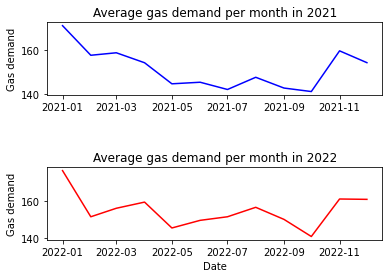

In [267]:
# Visualisation 1
# Used matplotlib to display average gas demand per month in each year
# .to_datetime() function to convert the 'Date' column to a datetime data type
weather_gas_demand_monthly['Date'] = pd.to_datetime(weather_gas_demand_monthly['Date'])
# Create separate dataframes for each year
dfmonthly_2021 = weather_gas_demand_monthly[weather_gas_demand_monthly['Date'].dt.year == 2021]
dfmonthly_2022 = weather_gas_demand_monthly[weather_gas_demand_monthly['Date'].dt.year == 2022]

fig, ax = plt.subplots(2, 1)
fig.subplots_adjust(hspace=1.0)

# Plot 2021 data
ax[0].plot(dfmonthly_2021['Date'], dfmonthly_2021['Total ROI demand'], color = 'b')
ax[0].set_title('Average gas demand per month in 2021')
ax[0].set_ylabel('Gas demand')

# Plot 2022 data
ax[1].plot(dfmonthly_2022['Date'], dfmonthly_2022['Total ROI demand'], color = 'r')
ax[1].set_title('Average gas demand per month in 2022')
ax[1].set_ylabel('Gas demand')
ax[1].set_xlabel('Date')

# Show the plot
plt.show()

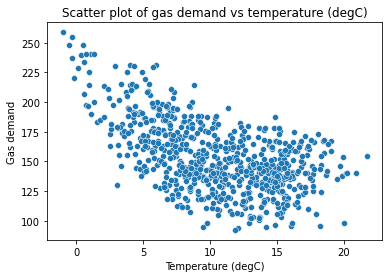

In [194]:
#Visualisation 2
#Scatter plot shows the relationship between temperature and gas demand
sns.scatterplot(x='temperature (degC)', y='Total ROI demand', data=weather_gas_demand)
plt.title('Scatter plot of gas demand vs temperature (degC)')
plt.xlabel('Temperature (degC)')
plt.ylabel('Gas demand')
plt.show()

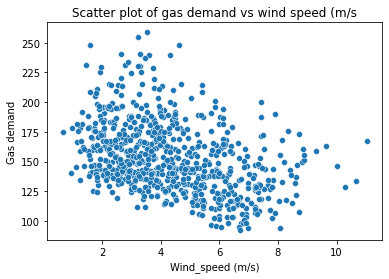

In [303]:
#Visualisation 3
#Scatter plot shows the relationship between wing and gas demand
sns.scatterplot(x='wind_speed (m/s)', y='Total ROI demand', data=weather_gas_demand)
plt.title('Scatter plot of gas demand vs wind speed (m/s')
plt.xlabel('Wind_speed (m/s)')
plt.ylabel('Gas demand')
plt.show()